In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [5]:
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Text(0.5, 1.0, 'Number of classes')

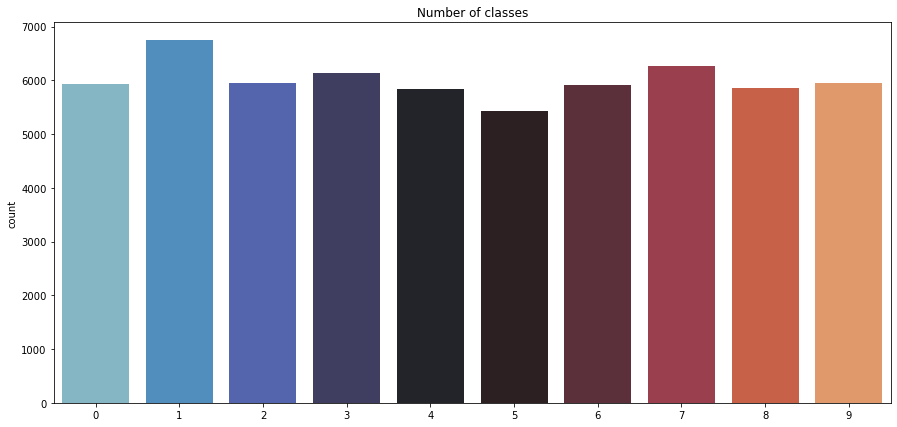

In [6]:
plt.figure(figsize=(15,7))
a = sns.countplot(trainy, palette="icefire")
plt.title("Number of classes")

In [7]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [8]:
trainX = np.reshape(trainX, (60000, 784))

In [9]:
28*28

784

In [10]:
trainX.shape

(60000, 784)

In [11]:
trainX = pd.DataFrame(trainX)

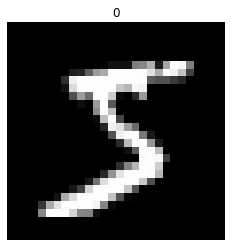

In [12]:
# plot some samples
img = trainX.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(trainX.iloc[0,0])
plt.axis("off")
plt.show()

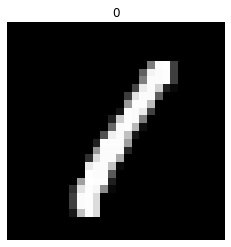

In [13]:
# plot some samples
img = trainX.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(trainX.iloc[3,0])
plt.axis("off")
plt.show()

In [14]:
trainX.shape

(60000, 784)

In [15]:
testX = np.reshape(testX, (10000, 784))
testX = pd.DataFrame(testX)
testX = testX.values.reshape(-1,28,28,1)
testX.shape

(10000, 28, 28, 1)

In [16]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
trainy = to_categorical(trainy, num_classes = 10)

In [17]:
trainy.shape

(60000, 10)

In [18]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
testy = to_categorical(testy, num_classes = 10)

In [19]:
testy.shape

(10000, 10)

In [20]:
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(60000, 784)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [21]:
# Normalize the data
trainX = trainX / 255.0
testX = testX / 255.0
print("x_train shape: ",trainX.shape)
print("test shape: ",testX.shape)

x_train shape:  (60000, 784)
test shape:  (10000, 28, 28, 1)


In [23]:
# Some examples
"""plt.imshow(trainX[2][:,:,0],cmap='gray')
plt.show()"""

"plt.imshow(trainX[2][:,:,0],cmap='gray')\nplt.show()"

In [24]:
from tensorflow.keras.layers import Dense, BatchNormalization

In [28]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [29]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 10  # for better result increase the epochs
batch_size = 250
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(trainX)
# Fit the model
history = model.fit_generator(datagen.flow(trainX, trainy, batch_size=batch_size),
                              epochs = epochs, validation_data = (testX,testy), steps_per_epoch=trainX.shape[0] // batch_size)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (60000, 784)

In [27]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testy,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()